In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch
# from GEH_LOSS import GEH_loss
import geh as ga

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train_Multi.save") 
Xtest = joblib.load("002weeks_test_Multi.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

In [56]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.rc('font', size=22)

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [14]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 6                # No of loop detectors
n_seq = 3                     # Subsequences
n_steps = 5                   # time-step per subsequence
# val_percent = 0.07567       # 2 weeks
val_percent = 0.2        
batch_size = 32

n_seq_ = 3                     # Subsequences
n_steps_ = 3                   # time-step per subsequence

#### 5 mins

In [15]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [16]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [17]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [18]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [19]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [20]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [21]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [22]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [23]:
# define no_of_channels
n_channels = 1

In [24]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [25]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [26]:
# Train data
Wt5  =  Wt5.reshape(Wt5.shape[0], n_seq_, n_steps_, n_features)
Wt15 =  Wt15.reshape(Wt15.shape[0], n_seq_, n_steps_, n_features)
Wt30 =  Wt30.reshape(Wt30.shape[0], n_seq_, n_steps_, n_features)
Wt60 =  Wt60.reshape(Wt60.shape[0], n_seq_, n_steps_, n_features)

# Validation data
Wv5  =  Wv5.reshape(Wv5.shape[0], n_seq_, n_steps_, n_features)
Wv15 =  Wv15.reshape(Wv15.shape[0], n_seq_, n_steps_, n_features)
Wv30 =  Wv30.reshape(Wv30.shape[0], n_seq_, n_steps_, n_features)
Wv60 =  Wv60.reshape(Wv60.shape[0], n_seq_, n_steps_, n_features)

In [27]:
Xt5.shape

(49233, 3, 5, 6, 1)

In [28]:
Wt5.shape

(49233, 3, 3, 6)

# CNN-LSTM model

In [29]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [30]:
Wide_train_5.shape

(49233, 9, 6)

# 5 mins ahead

In [30]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt5.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_5w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_5w)
    
    
    # Deep Model
    # CNN 
    CNN_5 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5)
    # LSTM          
    LSTM_5 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_5)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_5, LSTM_5], axis=1)

    # Attention
    Att_5 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_5)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                                   
    return model_5

In [31]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="8a-5",
)

In [32]:
tuner5.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [33]:
tuner5.search((Wt5,Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

Trial 60 Complete [00h 07m 00s]
val_loss: 734.6591186523438

Best val_loss So Far: 379.8266143798828
Total elapsed time: 00h 40m 41s
INFO:tensorflow:Oracle triggered exit


In [34]:
tuner5.results_summary(1)

Results summary
Results in C:\RunsOak\8a-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 86
filters: 64
kernel_size: 3
learning_rate: 0.001
Score: 379.8266143798828


### Best Model

In [35]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [36]:
scaler_filename = "Best_HP/8a-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/8a-5']

In [37]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 6)]    0           []                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 4, 64)  640        ['DeepInput[0][0]']              
 buted)                                                                                           
                                                                                            

In [38]:
model5.fit((Wt5,Xt5), yt5, 
           epochs = 100, 
           verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 24s 13ms/step - loss: 5091.4775 - mean_absolute_error: 44.1372 - root_mean_squared_error: 71.3546 - mean_absolute_percentage_error: 58.7683
Epoch 2/100
1539/1539 [==============================] - 20s 13ms/step - loss: 720.1926 - mean_absolute_error: 18.8023 - root_mean_squared_error: 26.8364 - mean_absolute_percentage_error: 30.3378
Epoch 3/100
1539/1539 [==============================] - 19s 12ms/step - loss: 531.9703 - mean_absolute_error: 16.0269 - root_mean_squared_error: 23.0645 - mean_absolute_percentage_error: 25.2640
Epoch 4/100
1539/1539 [==============================] - 19s 13ms/step - loss: 459.3876 - mean_absolute_error: 15.0489 - root_mean_squared_error: 21.4333 - mean_absolute_percentage_error: 22.8458
Epoch 5/100
1539/1539 [==============================] - 20s 13ms/step - loss: 427.1950 - mean_absolute_error: 14.5311 - root_mean_squared_error: 20.6687 - mean_absolute_percentage_error: 21.3143
Epoch 6/100
1539/15

1539/1539 [==============================] - 19s 13ms/step - loss: 274.5161 - mean_absolute_error: 11.7540 - root_mean_squared_error: 16.5685 - mean_absolute_percentage_error: 16.3499 9s - loss: 270.8096 - mean_absolute_error: 11.6721 - root_mean_squared_error: 16.4563 - mean_absolute
Epoch 84/100
1539/1539 [==============================] - 19s 13ms/step - loss: 273.7678 - mean_absolute_error: 11.7328 - root_mean_squared_error: 16.5459 - mean_absolute_percentage_error: 16.3471
Epoch 85/100
1539/1539 [==============================] - 20s 13ms/step - loss: 271.5109 - mean_absolute_error: 11.6927 - root_mean_squared_error: 16.4776 - mean_absolute_percentage_error: 16.2914
Epoch 86/100
1539/1539 [==============================] - 20s 13ms/step - loss: 270.4441 - mean_absolute_error: 11.6722 - root_mean_squared_error: 16.4452 - mean_absolute_percentage_error: 16.2255
Epoch 87/100
1539/1539 [==============================] - 20s 13ms/step - loss: 268.6337 - mean_absolute_error: 11.6464 - r

In [39]:
model5.save("my_dir/8a-5")

INFO:tensorflow:Assets written to: my_dir/8a-5\assets


INFO:tensorflow:Assets written to: my_dir/8a-5\assets


In [40]:
metrics5 = pd.DataFrame(model5.history.history)

<AxesSubplot:>

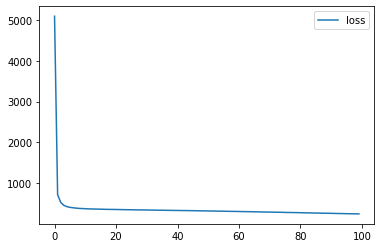

In [41]:
metrics5[['loss']].plot()

In [31]:
model5 = keras.models.load_model("my_dir/8a-5", custom_objects=SeqSelfAttention.get_custom_objects()) 

In [32]:
model5.predict((Wv5,Xv5))

array([[ 29.914654 ,  18.791618 ,  24.836315 ,  75.23582  ,  34.081085 ,
          5.342311 ],
       [ 29.125185 ,  16.384914 ,  23.379498 ,  73.66427  ,  32.036816 ,
          6.4321327],
       [ 29.805798 ,  17.731197 ,  21.399944 ,  71.09581  ,  32.106598 ,
          3.5656488],
       ...,
       [ 42.247425 ,  41.425056 ,  56.395412 , 114.05431  ,  52.944775 ,
         12.665791 ],
       [ 41.200893 ,  35.409637 ,  48.264465 , 101.539116 ,  47.129635 ,
         12.547594 ],
       [ 41.490864 ,  36.421017 ,  46.603283 ,  99.02627  ,  45.6676   ,
          7.440952 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MSE5, MAE5, RMSE5, MAPE5]
print(eval5)

In [34]:
err = yv5 - test_predictions5

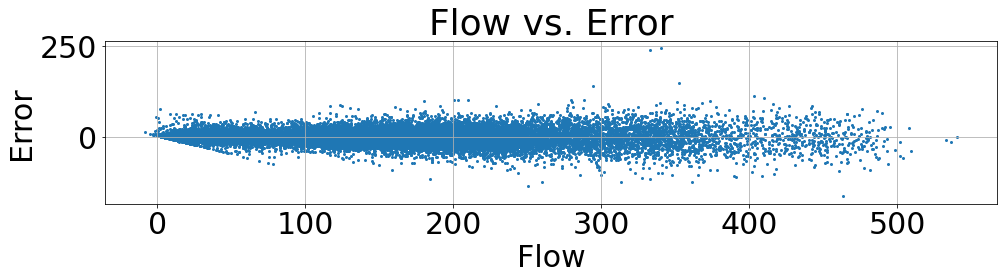

In [35]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(test_predictions5, err, 4)
axes.set_xlabel('Flow')
axes.set_ylabel('Error')
axes.set_title('Flow vs. Error')
axes.grid()

In [36]:
a = err.flatten().reshape(-1, 1)
b = test_predictions5.flatten().reshape(-1, 1)
c = np.concatenate((a,b), axis=1)

<AxesSubplot:>

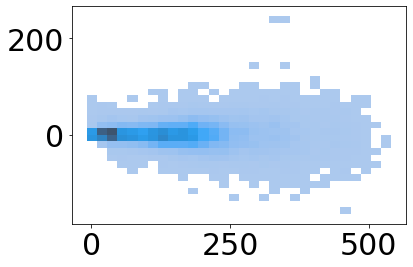

In [37]:
sns.histplot(data=c, x=c[:,1], y=c[:,0], bins=30)

<AxesSubplot:ylabel='Count'>

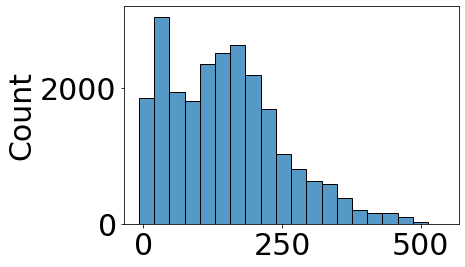

In [38]:
sns.histplot(data=c, x=c[:,1], bins=20)

In [39]:
d = np.diff(yv5, axis=0).flatten().reshape(-1, 1)
c = np.concatenate((c[6:,:],d), axis=1)

<AxesSubplot:>

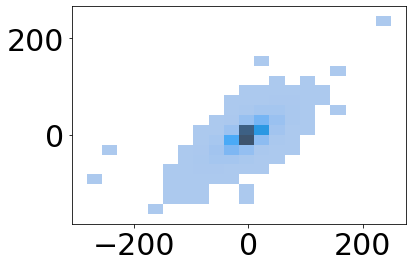

In [41]:
# derivative - x
# error - y
sns.histplot(data=c, x=c[:,2], y=c[:,0], bins=20)

<AxesSubplot:ylabel='Count'>

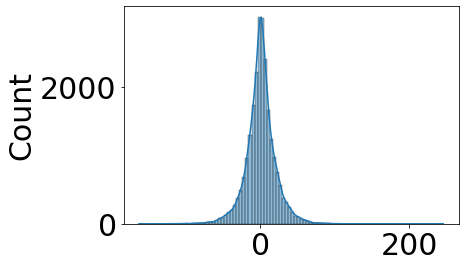

In [42]:
# error dist.
sns.histplot(data=c, x=c[:,0], bins=100, kde=True)

In [43]:
GEH, count = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH5 = count/GEH.size
print(GEH5)

0.6808148701352584


C:\Users\esugom\OneDrive - Coventry University\CodePhD\Oakland\geh.py:6: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2 * ((predicted - actual) ** 2) / (predicted + actual))


In [44]:
e = GEH.flatten().reshape(-1, 1)
c = np.concatenate((c,e[6:,:]), axis=1)

In [45]:
# 0 - error
# 1 - test predictions flow
# 2 - dirivative
# 3 - GEH

In [46]:
c

array([[  1.87481499,  29.12518501,   6.        ,   1.18450166],
       [  2.6150856 ,  16.3849144 ,   5.        ,   2.15368635],
       [  4.62050247,  23.37949753, -12.        ,   3.15791202],
       ...,
       [ -1.02626801,  99.02626801, -14.        ,   0.3581816 ],
       [ -3.66759872,  45.66759872,   3.        ,   1.91896799],
       [  4.55904818,   7.44095182,   1.        ,   5.06548527]])

<AxesSubplot:ylabel='Count'>

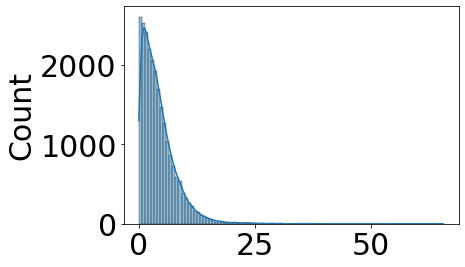

In [47]:
# GEH dist.
sns.histplot(data=c, x=c[:,3], bins=100, kde=True)

<AxesSubplot:>

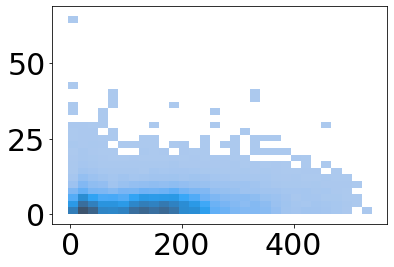

In [48]:
# flow = x vs GEH = y
sns.histplot(data=c, x=c[:,1], y=c[:,3], bins=30)

In [67]:
c[:,3]

array([1.1844984 , 2.15368635, 3.15791202, ..., 0.35818514, 1.91897581,
       5.06548133])

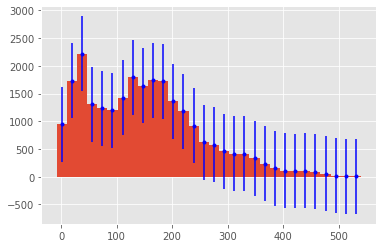

In [75]:
plt.style.use('ggplot')

# plt.hist gives you the entries, edges 
# and drawables we do not need the drawables:
entries, edges, _ = plt.hist(x=c[:,1], bins=30)

# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(bin_centers, entries, yerr=np.std(entries), fmt='b.')
plt.plot
plt.show()

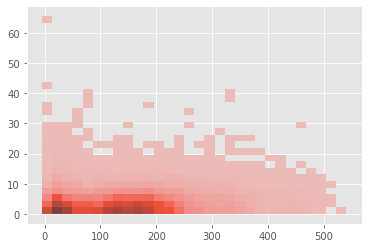

In [77]:
aa = sns.histplot(data=c, x=c[:,1], y=c[:,3], bins=30)

In [79]:
c

array([[  1.87480927,  29.12519073,   6.        ,   1.1844984 ],
       [  2.6150856 ,  16.3849144 ,   5.        ,   2.15368635],
       [  4.62050438,  23.37949562, -12.        ,   3.15791202],
       ...,
       [ -1.02627563,  99.02627563, -14.        ,   0.35818514],
       [ -3.66761398,  45.66761398,   3.        ,   1.91897581],
       [  4.55904531,   7.44095469,   1.        ,   5.06548133]])

C:\Users\esugom\AppData\Local\Temp\ipykernel_16472\1012612399.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


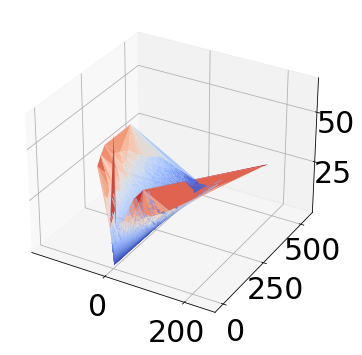

In [51]:
# Make the plot
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(c[:,0], c[:,1], c[:,3], cmap=plt.cm.coolwarm, linewidth=0.2)
plt.show()
 
# # to Add a color bar which maps values to colors.
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf=ax.plot_trisurf(c[:,0], c[:,1], c[:,3], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()

# 15 mins ahead

In [46]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt15.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_15w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_15w)
    
    
    # Deep Model
    # CNN 
    CNN_15 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15)
    # LSTM          
    LSTM_15 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_15)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_15, LSTM_15], axis=1)

    # Attention
    Att_15 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_15)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [47]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="8a-15",
)

In [48]:
tuner15.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [49]:
tuner15.search((Wt15,Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

Trial 60 Complete [00h 12m 25s]
val_loss: 458.8946838378906

Best val_loss So Far: 439.25047302246094
Total elapsed time: 03h 49m 01s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [50]:
tuner15.results_summary(1)

Results summary
Results in C:\RunsOak\8a-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 79
filters: 224
kernel_size: 2
learning_rate: 0.0001
Score: 439.25047302246094


### Best model

In [51]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [52]:
scaler_filename = "Best_HP/8a-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/8a-15']

In [53]:
model15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 6)]    0           []                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 5, 224  1120       ['DeepInput[0][0]']              
 buted)                         )                                                                 
                                                                                            

In [54]:
model15.fit((Wt15,Xt15), yt15, 
            epochs = 100, 
            verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 26s 12ms/step - loss: 22113.3379 - mean_absolute_error: 114.7150 - root_mean_squared_error: 148.7054 - mean_absolute_percentage_error: 98.8982
Epoch 2/100
1539/1539 [==============================] - 19s 12ms/step - loss: 11232.0098 - mean_absolute_error: 74.7501 - root_mean_squared_error: 105.9812 - mean_absolute_percentage_error: 81.5906
Epoch 3/100
1539/1539 [==============================] - 19s 12ms/step - loss: 6086.1885 - mean_absolute_error: 52.2273 - root_mean_squared_error: 78.0140 - mean_absolute_percentage_error: 68.0896
Epoch 4/100
1539/1539 [==============================] - 18s 12ms/step - loss: 3526.6387 - mean_absolute_error: 39.5657 - root_mean_squared_error: 59.3855 - mean_absolute_percentage_error: 58.2762
Epoch 5/100
1539/1539 [==============================] - 18s 12ms/step - loss: 2241.4299 - mean_absolute_error: 32.2488 - root_mean_squared_error: 47.3438 - mean_absolute_percentage_error: 48.5655
Epoch 6/10

1539/1539 [==============================] - 18s 12ms/step - loss: 414.0547 - mean_absolute_error: 14.1294 - root_mean_squared_error: 20.3483 - mean_absolute_percentage_error: 19.8728 6s -
Epoch 82/100
1539/1539 [==============================] - 18s 12ms/step - loss: 412.8876 - mean_absolute_error: 14.1111 - root_mean_squared_error: 20.3196 - mean_absolute_percentage_error: 19.8427
Epoch 83/100
1539/1539 [==============================] - 18s 12ms/step - loss: 412.4951 - mean_absolute_error: 14.1039 - root_mean_squared_error: 20.3100 - mean_absolute_percentage_error: 19.8039
Epoch 84/100
1539/1539 [==============================] - 18s 11ms/step - loss: 412.1221 - mean_absolute_error: 14.0997 - root_mean_squared_error: 20.3008 - mean_absolute_percentage_error: 19.8546
Epoch 85/100
1539/1539 [==============================] - 18s 12ms/step - loss: 412.0800 - mean_absolute_error: 14.0988 - root_mean_squared_error: 20.2998 - mean_absolute_percentage_error: 19.8144
Epoch 86/100
1539/1539 

In [55]:
model15.save("my_dir/8a-15")

INFO:tensorflow:Assets written to: my_dir/8a-15\assets


INFO:tensorflow:Assets written to: my_dir/8a-15\assets


In [56]:
metrics15 = pd.DataFrame(model15.history.history)

<AxesSubplot:>

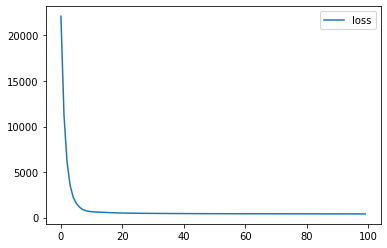

In [57]:
metrics15[['loss']].plot()

In [32]:
model15 = keras.models.load_model("my_dir/8a-15", custom_objects=SeqSelfAttention.get_custom_objects())

In [59]:
model15.predict((Wv15,Xv15))

array([[ 32.36768  ,  22.384735 ,  28.88665  ,  74.6526   ,  30.03909  ,
          3.0251958],
       [ 30.593832 ,  19.779678 ,  27.938778 ,  75.04236  ,  30.473528 ,
          3.4109426],
       [ 30.097656 ,  18.485456 ,  24.937195 ,  71.68019  ,  28.940044 ,
          2.7640324],
       ...,
       [ 46.983288 ,  47.46641  ,  61.264763 , 116.85553  ,  52.63214  ,
         11.910154 ],
       [ 43.49705  ,  41.960144 ,  56.939808 , 112.14911  ,  50.962337 ,
         15.604166 ],
       [ 40.35789  ,  36.858887 ,  48.125175 , 104.40556  ,  45.39969  ,
         15.138083 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MSE15, MAE15, RMSE15, MAPE15]
print(eval15)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH15 = count/GEH.size
print(GEH15)

# 30 mins ahead

In [62]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt30.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_30w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_30w)
    
    
    # Deep Model
    # CNN 
    CNN_30 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30)
    # LSTM          
    LSTM_30 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_30)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_30, LSTM_30], axis=1)

    # Attention
    Att_30 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_30)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [63]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="8a-30",
)

In [64]:
tuner30.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [65]:
tuner30.search((Wt30,Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 60 Complete [00h 10m 30s]
val_loss: 491.2345886230469

Best val_loss So Far: 487.9028778076172
Total elapsed time: 01h 29m 06s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [66]:
tuner30.results_summary(1)

Results summary
Results in C:\RunsOak\8a-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 47
filters: 128
kernel_size: 2
learning_rate: 0.001
Score: 487.9028778076172


### Best model

In [67]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [68]:
scaler_filename = "8a-30"
joblib.dump(best_hp30, scaler_filename) 

['8a-30']

In [69]:
model30.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 6)]    0           []                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 5, 128  640        ['DeepInput[0][0]']              
 buted)                         )                                                                 
                                                                                            

In [70]:
model30.fit((Wt30,Xt30), yt30, 
            epochs = 100, 
            verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 25s 14ms/step - loss: 8335.7842 - mean_absolute_error: 59.9214 - root_mean_squared_error: 91.3005 - mean_absolute_percentage_error: 70.3934
Epoch 2/100
1539/1539 [==============================] - 20s 13ms/step - loss: 1350.0099 - mean_absolute_error: 25.7999 - root_mean_squared_error: 36.7425 - mean_absolute_percentage_error: 39.5312
Epoch 3/100
1539/1539 [==============================] - 21s 13ms/step - loss: 785.7194 - mean_absolute_error: 19.6930 - root_mean_squared_error: 28.0307 - mean_absolute_percentage_error: 31.6560
Epoch 4/100
1539/1539 [==============================] - 20s 13ms/step - loss: 655.4918 - mean_absolute_error: 17.8932 - root_mean_squared_error: 25.6026 - mean_absolute_percentage_error: 28.7691
Epoch 5/100
1539/1539 [==============================] - 20s 13ms/step - loss: 597.6487 - mean_absolute_error: 17.1004 - root_mean_squared_error: 24.4469 - mean_absolute_percentage_error: 26.5289
Epoch 6/100
1539/1

1539/1539 [==============================] - 21s 13ms/step - loss: 325.8342 - mean_absolute_error: 12.8211 - root_mean_squared_error: 18.0509 - mean_absolute_percentage_error: 19.1516
Epoch 83/100
1539/1539 [==============================] - 21s 14ms/step - loss: 324.2189 - mean_absolute_error: 12.8013 - root_mean_squared_error: 18.0061 - mean_absolute_percentage_error: 19.1665
Epoch 84/100
1539/1539 [==============================] - 21s 13ms/step - loss: 322.7448 - mean_absolute_error: 12.7699 - root_mean_squared_error: 17.9651 - mean_absolute_percentage_error: 19.1465
Epoch 85/100
1539/1539 [==============================] - 21s 13ms/step - loss: 321.7113 - mean_absolute_error: 12.7602 - root_mean_squared_error: 17.9363 - mean_absolute_percentage_error: 19.1430
Epoch 86/100
1539/1539 [==============================] - 20s 13ms/step - loss: 319.9738 - mean_absolute_error: 12.7309 - root_mean_squared_error: 17.8878 - mean_absolute_percentage_error: 19.0907
Epoch 87/100
1539/1539 [====

In [71]:
model30.save("my_dir/8a-30")

INFO:tensorflow:Assets written to: my_dir/8a-30\assets


INFO:tensorflow:Assets written to: my_dir/8a-30\assets


In [72]:
metrics30 = pd.DataFrame(model30.history.history)

<AxesSubplot:>

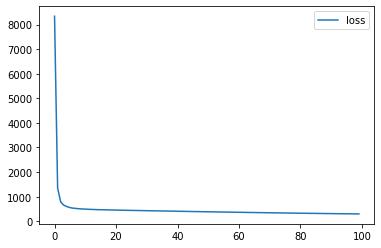

In [73]:
metrics30[['loss']].plot()

In [33]:
model30 = keras.models.load_model("my_dir/8a-30", custom_objects=SeqSelfAttention.get_custom_objects())

In [75]:
model30.predict((Wv30,Xv30))

array([[ 27.06395  ,  14.05634  ,  18.446356 ,  61.508217 ,  28.057526 ,
          3.6623185],
       [ 26.756947 ,  13.901024 ,  14.450296 ,  58.63642  ,  24.644358 ,
          3.6292746],
       [ 28.447771 ,  15.785947 ,  18.189331 ,  62.540676 ,  29.646067 ,
          4.255053 ],
       ...,
       [ 47.318848 ,  45.66744  ,  55.05055  , 115.60721  ,  52.306072 ,
          8.89345  ],
       [ 51.467884 ,  51.569756 ,  64.25345  , 120.9952   ,  57.65207  ,
         18.639763 ],
       [ 49.009403 ,  48.476723 ,  57.22013  , 111.82519  ,  54.49003  ,
         14.696289 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MSE30, MAE30, RMSE30, MAPE30]
print(eval30)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH30 = count/GEH.size
print(GEH30)

# 60 mins ahead

In [78]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt60.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_60w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_60w)
    
    
    # Deep Model
    # CNN 
    CNN_60 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60)
    # LSTM          
    LSTM_60 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_60)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_60, LSTM_60], axis=1)

    # Attention
    Att_60 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_60)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [79]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=True,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="8a-60",
)

In [80]:
tuner60.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [81]:
tuner60.search((Wt60,Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 60 Complete [00h 34m 44s]
val_loss: 556.5910339355469

Best val_loss So Far: 547.30224609375
Total elapsed time: 21h 30m 35s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [82]:
tuner60.results_summary(1)

Results summary
Results in C:\RunsOak\8a-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 89
filters: 160
kernel_size: 2
learning_rate: 0.001
Score: 547.30224609375


### Best model

In [83]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [84]:
scaler_filename = "Best_HP/8a-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/8a-60']

In [85]:
model60.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 6)]    0           []                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 5, 160  800        ['DeepInput[0][0]']              
 buted)                         )                                                                 
                                                                                            

In [86]:
model60.fit((Wt60,Xt60), yt60, 
            epochs = 100, 
            verbose = 1
            )

Epoch 1/100
1539/1539 [==============================] - 25s 13ms/step - loss: 5242.4185 - mean_absolute_error: 45.8483 - root_mean_squared_error: 72.4045 - mean_absolute_percentage_error: 61.8943
Epoch 2/100
1539/1539 [==============================] - 20s 13ms/step - loss: 1013.3586 - mean_absolute_error: 22.7812 - root_mean_squared_error: 31.8333 - mean_absolute_percentage_error: 36.6575
Epoch 3/100
1539/1539 [==============================] - 20s 13ms/step - loss: 743.6140 - mean_absolute_error: 19.1346 - root_mean_squared_error: 27.2693 - mean_absolute_percentage_error: 31.2922
Epoch 4/100
1539/1539 [==============================] - 19s 13ms/step - loss: 669.7357 - mean_absolute_error: 18.0997 - root_mean_squared_error: 25.8793 - mean_absolute_percentage_error: 28.4115
Epoch 5/100
1539/1539 [==============================] - 19s 12ms/step - loss: 626.6930 - mean_absolute_error: 17.5118 - root_mean_squared_error: 25.0338 - mean_absolute_percentage_error: 26.4159
Epoch 6/100
1539/1

1539/1539 [==============================] - 21s 13ms/step - loss: 334.4809 - mean_absolute_error: 12.9788 - root_mean_squared_error: 18.2888 - mean_absolute_percentage_error: 19.0734
Epoch 84/100
1539/1539 [==============================] - 20s 13ms/step - loss: 333.4614 - mean_absolute_error: 12.9559 - root_mean_squared_error: 18.2609 - mean_absolute_percentage_error: 19.0691
Epoch 85/100
1539/1539 [==============================] - 20s 13ms/step - loss: 331.6508 - mean_absolute_error: 12.9198 - root_mean_squared_error: 18.2113 - mean_absolute_percentage_error: 18.9990
Epoch 86/100
1539/1539 [==============================] - 20s 13ms/step - loss: 327.9016 - mean_absolute_error: 12.8555 - root_mean_squared_error: 18.1080 - mean_absolute_percentage_error: 18.9048
Epoch 87/100
1539/1539 [==============================] - 20s 13ms/step - loss: 326.3887 - mean_absolute_error: 12.8339 - root_mean_squared_error: 18.0662 - mean_absolute_percentage_error: 18.9210
Epoch 88/100
1539/1539 [====

In [87]:
model60.save("my_dir/8a-60")

INFO:tensorflow:Assets written to: my_dir/8a-60\assets


INFO:tensorflow:Assets written to: my_dir/8a-60\assets


In [88]:
metrics60 = pd.DataFrame(model60.history.history)

<AxesSubplot:>

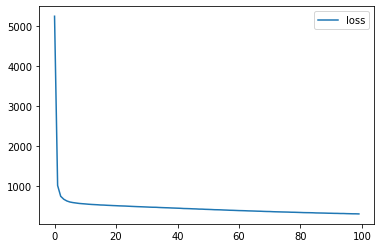

In [89]:
metrics60[['loss']].plot()

In [34]:
model60 = keras.models.load_model("my_dir/8a-60", custom_objects=SeqSelfAttention.get_custom_objects())

In [91]:
model60.predict((Wv60,Xv60))

array([[ 30.127054 ,  16.127226 ,  17.567545 ,  61.868755 ,  29.797714 ,
          5.241593 ],
       [ 29.455692 ,  15.395089 ,  12.677343 ,  57.06145  ,  28.17541  ,
          2.2355564],
       [ 29.139166 ,  14.742309 ,  13.474688 ,  57.60087  ,  28.59797  ,
          3.1858778],
       ...,
       [ 38.213573 ,  38.490807 ,  66.37027  , 130.7127   ,  58.34734  ,
         22.452633 ],
       [ 40.02099  ,  38.153854 ,  56.70036  , 121.612335 ,  49.561615 ,
         11.933891 ],
       [ 38.556087 ,  34.044613 ,  48.519783 , 110.35029  ,  44.35518  ,
          7.9856954]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MSE60, MAE60, RMSE60, MAPE60]
print(eval60)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH60 = count/GEH.size
print(GEH60)